In [43]:
from sklearn import datasets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plot

iris = datasets.load_iris()
#iris
item = ['sepal length (cm)' , 'sepal width (cm)' , 'petal length (cm)' , 'petal width (cm)']
df = pd.DataFrame(data = iris['data'],columns = item)
df_target = pd.DataFrame(data = iris['target'],columns = ['target'])

In [44]:
#將data與target值合併，回傳至df表格
df= pd.concat([df,df_target],axis = 1)
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal length (cm)    150 non-null float64
sepal width (cm)     150 non-null float64
petal length (cm)    150 non-null float64
petal width (cm)     150 non-null float64
target               150 non-null int32
dtypes: float64(4), int32(1)
memory usage: 5.4 KB
None
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.054000           3.758667   
std             0.828066          0.433594           1.764420   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)      target  
count    

In [29]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target
0,5.1,3.5,1.4,0.2,0,0
1,4.9,3.0,1.4,0.2,0,0
2,4.7,3.2,1.3,0.2,0,0
3,4.6,3.1,1.5,0.2,0,0
4,5.0,3.6,1.4,0.2,0,0
5,5.4,3.9,1.7,0.4,0,0
6,4.6,3.4,1.4,0.3,0,0
7,5.0,3.4,1.5,0.2,0,0
8,4.4,2.9,1.4,0.2,0,0
9,4.9,3.1,1.5,0.1,0,0


x =  sepal length (cm) y =  sepal width (cm)
x =  sepal length (cm) y =  petal length (cm)
x =  sepal length (cm) y =  petal width (cm)
x =  sepal width (cm) y =  sepal length (cm)
x =  sepal width (cm) y =  petal length (cm)
x =  sepal width (cm) y =  petal width (cm)
x =  petal length (cm) y =  sepal length (cm)
x =  petal length (cm) y =  sepal width (cm)
x =  petal length (cm) y =  petal width (cm)
x =  petal width (cm) y =  sepal length (cm)
x =  petal width (cm) y =  sepal width (cm)
x =  petal width (cm) y =  petal length (cm)


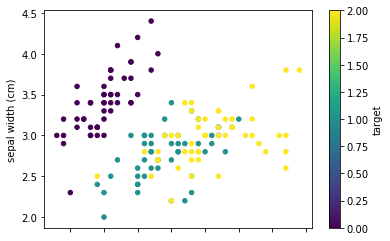

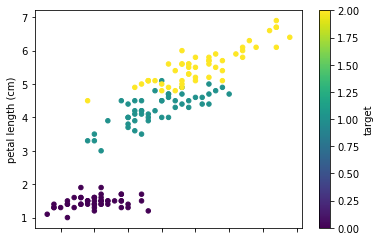

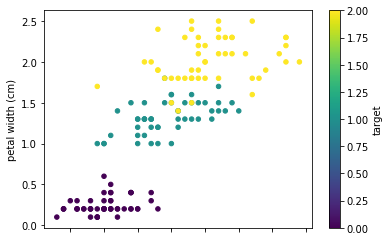

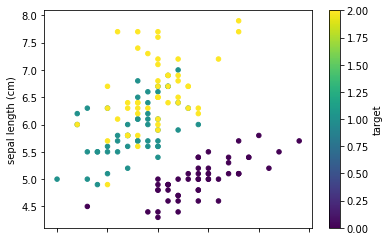

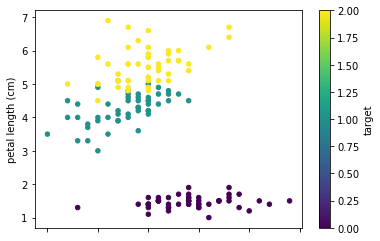

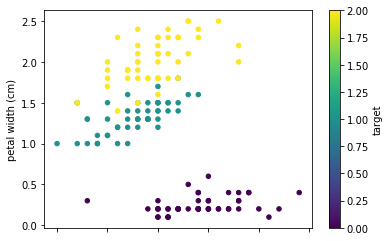

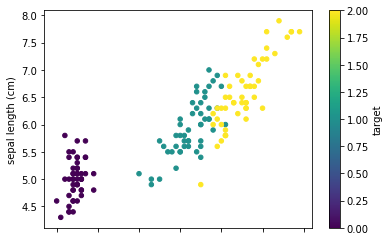

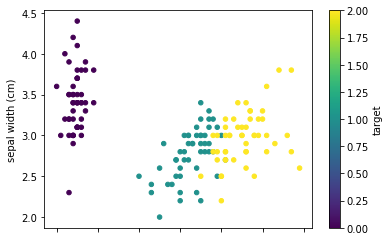

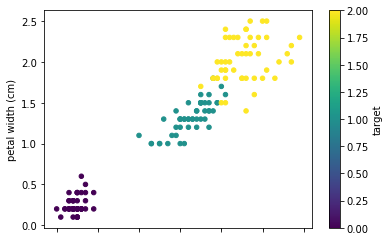

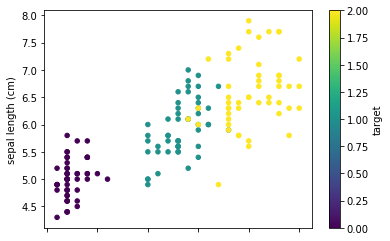

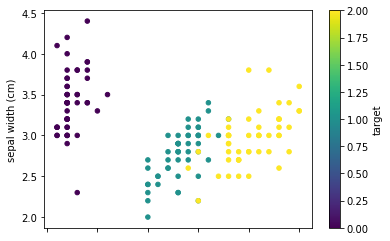

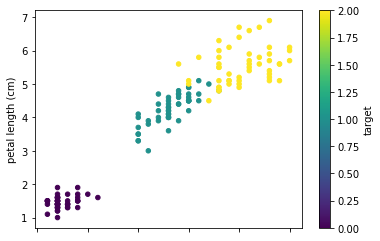

In [45]:
#資料視覺化
for i in range(4):
    for j in range(4):
        if i != j:
            df.plot.scatter(x = item[i],y = item[j],c = 'target',colormap = 'viridis')
            print('x = ',item[i],'y = ',item[j])

In [75]:
# 可觀察出不錯的分類效果 : 
# 1. 圖二 x =  sepal length (cm) y =  petal length (cm)
# 2. 圖三 x =  sepal length (cm) y =  petal width (cm)
# 3. 圖五 x =  sepal width (cm) y =  petal length (cm)
# 4. 圖六 x =  sepal width (cm) y =  petal width (cm)
# 5. 圖九 x =  petal length (cm) y =  petal width (cm)
# 6. 圖十二 x =  petal width (cm) y =  petal length (cm) [同5.]

In [78]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import tree
#分類方法:決策樹
clf = tree.DecisionTreeClassifier()

#1. 圖二的組合
x1 = df[['sepal length (cm)','petal length (cm)']]
y1 = df['target']
x1_train,x1_test,y1_train,y1_test = train_test_split(x1,y1,test_size = 0.3,random_state = 1)
clf1 = clf.fit(x1_train,y1_train)
y1_pred = clf1.predict(x1_test)
print('組合一accuracy : ',accuracy_score(y1_test,y1_pred))

#2. 圖三的組合
x2 = df[['sepal length (cm)','petal width (cm)']]
y2 = df['target']
x2_train,x2_test,y2_train,y2_test = train_test_split(x2,y2,test_size = 0.3,random_state = 1)
clf2 = clf.fit(x2_train,y2_train)
y2_pred = clf2.predict(x2_test)
print('組合二accuracy : ',accuracy_score(y2_test,y2_pred))

#3. 圖五的組合
x3 = df[['sepal width (cm)','petal length (cm)']]
y3 = df['target']
x3_train,x3_test,y3_train,y3_test = train_test_split(x3,y3,test_size = 0.3,random_state = 1)
clf3 = clf.fit(x3_train,y3_train)
y3_pred = clf3.predict(x3_test)
print('組合三accuracy : ',accuracy_score(y3_test,y3_pred))

#4. 圖六的組合
x4 = df[['sepal width (cm)','petal width (cm)']]
y4 = df['target']
x4_train,x4_test,y4_train,y4_test = train_test_split(x4,y4,test_size = 0.3,random_state = 1)
clf4 = clf.fit(x4_train,y4_train)
y4_pred = clf4.predict(x4_test)
print('組合四accuracy : ',accuracy_score(y4_test,y4_pred))

#5. 圖九的組合
x5 = df[['petal length (cm)','petal width (cm)']]
y5 = df['target']
x5_train,x5_test,y5_train,y5_test = train_test_split(x5,y5,test_size = 0.3,random_state = 1)
clf5 = clf.fit(x5_train,y5_train)
y5_pred = clf5.predict(x5_test)
print('組合五accuracy : ',accuracy_score(y5_test,y5_pred))

組合一accuracy :  0.9555555555555556
組合二accuracy :  0.9555555555555556
組合三accuracy :  0.9777777777777777
組合四accuracy :  0.8888888888888888
組合五accuracy :  0.9555555555555556
